# Titanic Survival Prediction

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import re

In [8]:
df = pd.read_csv('titanic.csv')

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [11]:
df.shape

(891, 12)

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the above we have 891 rows and 12 columns and the dtypes are int64, object, float64.

We can also see that there is no null values so we can say there is no outliers are present in the dataset.

# Data Analysis

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Types of features :

Categorical : Pclass, Sex, Embarked, Survived

Continuous : Age, Fare, Sibsp, Parch, PassengerId

Alphanumeric: Ticket, Cabin, Name

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the count column we can see that there is less value in 'Age' column so there is missing value present. and the dataset is not prefect.

There is not much difference between mean and meadian , almost same data is present, no skewness are present in the dataset.

In 75% percentile and max value there is some difference in PassengerId,Age , sibsp and Parch but huge difference between in Fare column. So here we can say that outliers are present in the dataset.


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can ee that in 'Age' and embarked column there is missing data that we have to fill but in 'Cabin' column there is 687 of data is missing respectively which is very large that we can drop.

<AxesSubplot:>

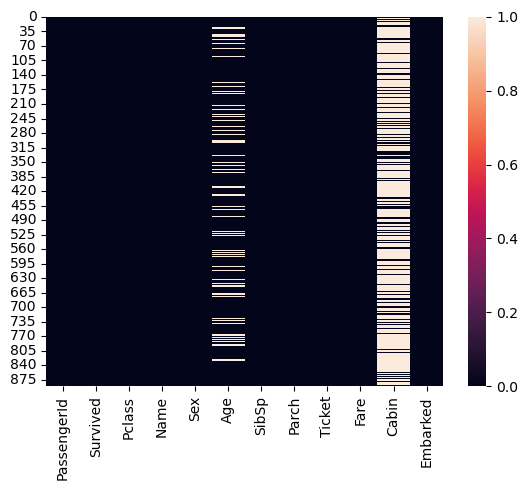

In [21]:
sns.heatmap(df.isnull())

In [22]:
dfcor=df.corr()

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<AxesSubplot:>

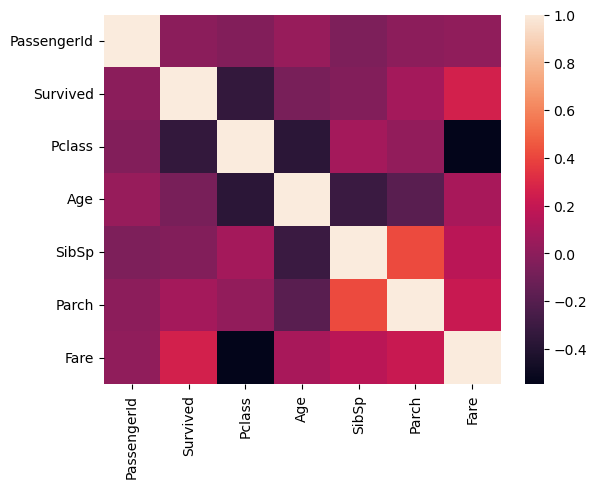

In [25]:
sns.heatmap(dfcor)

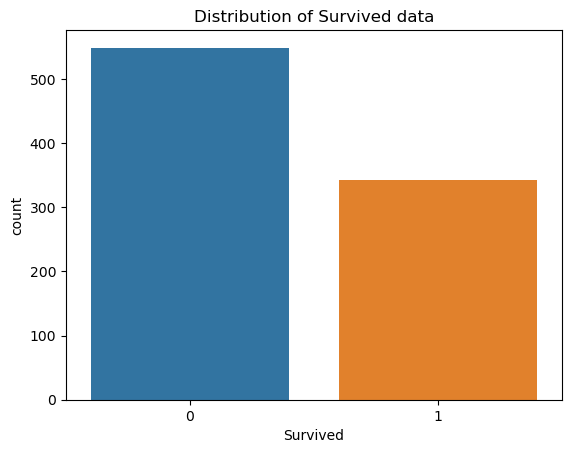

In [30]:
sns.countplot(x='Survived', data= df)
plt.title('Distribution of Survived data')
plt.show()

In [33]:
df.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

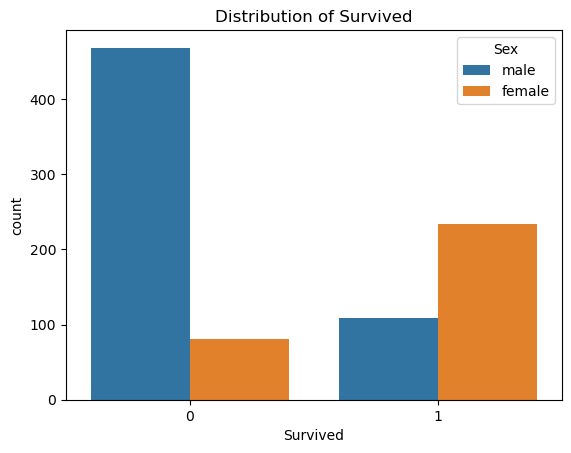

In [34]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.title('Distribution of Survived')
plt.show()

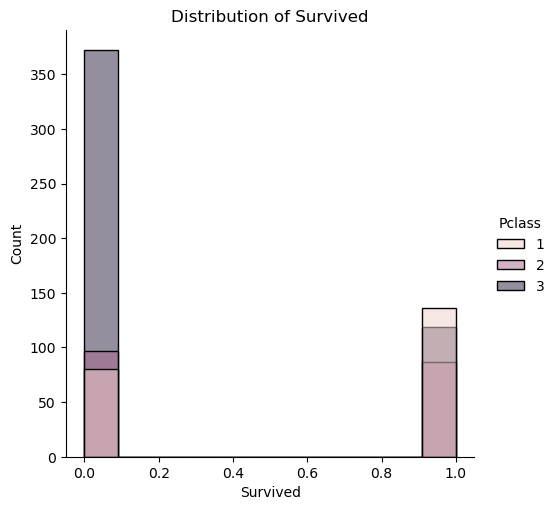

In [37]:
sns.displot(x='Survived',hue='Pclass', data=df)
plt.title('Distribution of Survived')
plt.show()

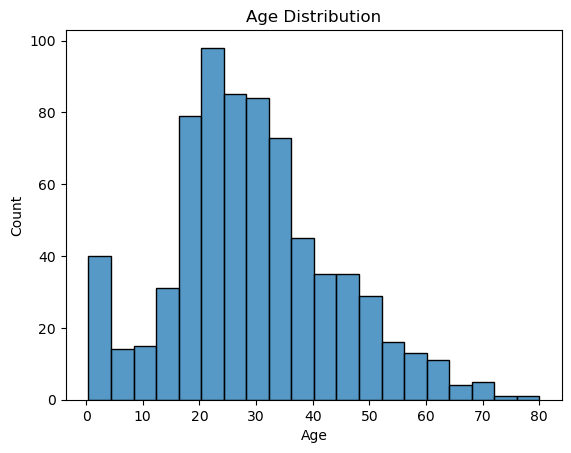

In [39]:
sns.histplot(df['Age'].dropna(),bins=20)
plt.title('Age Distribution')
plt.show()

Here we can see that there is more no. of people of age group 20-30 yrs. 

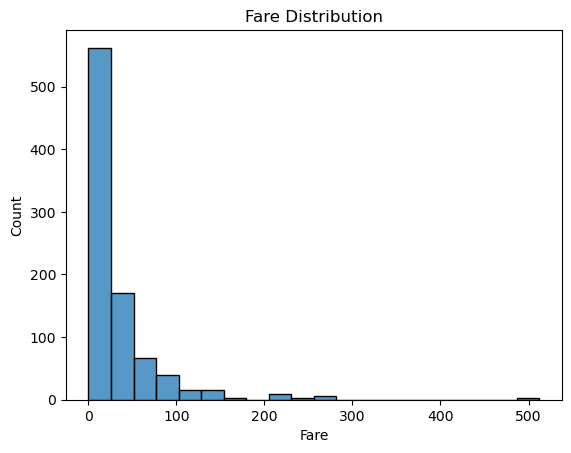

In [40]:
sns.histplot(df['Fare'],bins=20)
plt.title('Fare Distribution')
plt.show()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


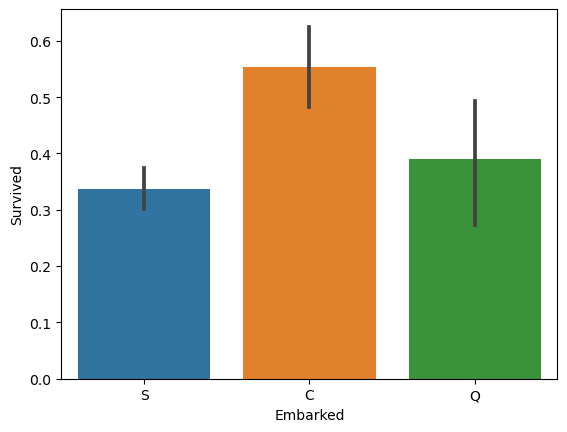

In [42]:
sns.barplot(x='Embarked',y='Survived',data=df)
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55%. This could be either due to their Sex or socio-economic class. Let's move forward to see the effect of having parents or children on-board.

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


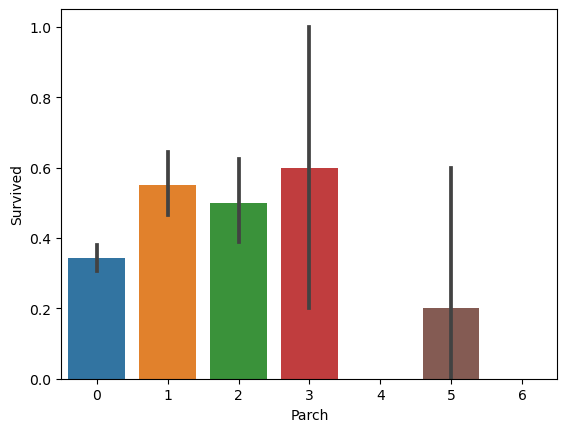

In [44]:
sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Looks like passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser. Moving on to the effect of having spouse or siblings on Survival:

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


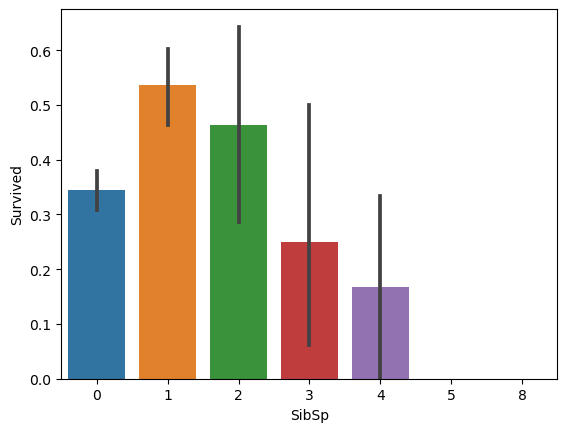

In [48]:
sns.barplot(x='SibSp',y='Survived',data=df)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

The Age column has some missing values. We will take care of that later when we clean our training data. First we shall proceed by:

Plotting a histogram of the age values .
Taking a look at the median value of age as well as the spread.

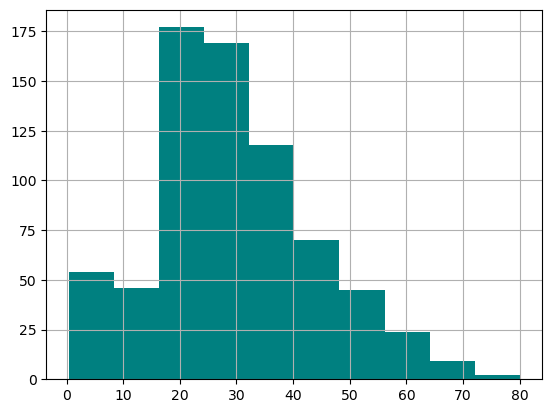

The meadian age of passenger is: 28
The standard deviation age of : 14


In [52]:
df.Age.hist(bins=10,color='teal')
plt.xlabel='Age'
plt.ylabel='Count'
plt.show()
print('The meadian age of passenger is:', int(df.Age.median()))
print('The standard deviation age of :',int(df.Age.std()))


It is obvious to assume that younger individuals were more likely to survive, however we should test our assumption before we proceed.

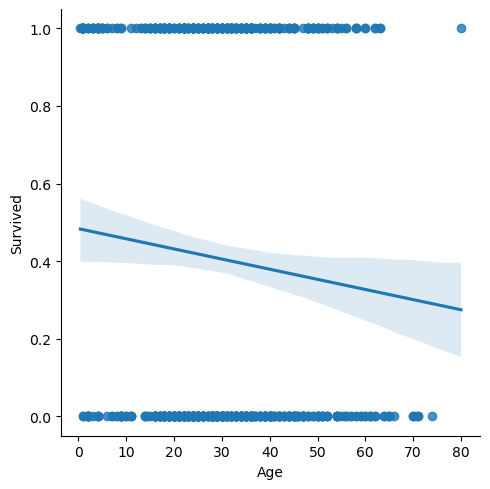

In [53]:
sns.lmplot(x='Age',y='Survived',data=df)

Our assumption was right, younger individuals were more likely to survive.

From the sex column we saw that there was a significant difference in the percentage of men and women that survived.

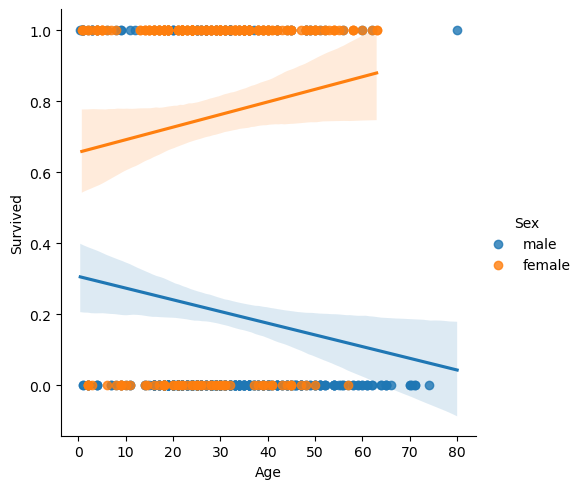

In [54]:
sns.lmplot(x='Age',y='Survived',hue='Sex', data=df)


Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

Takeaway: Age feature can have a different effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

<AxesSubplot:xlabel='Sex', ylabel='Age'>

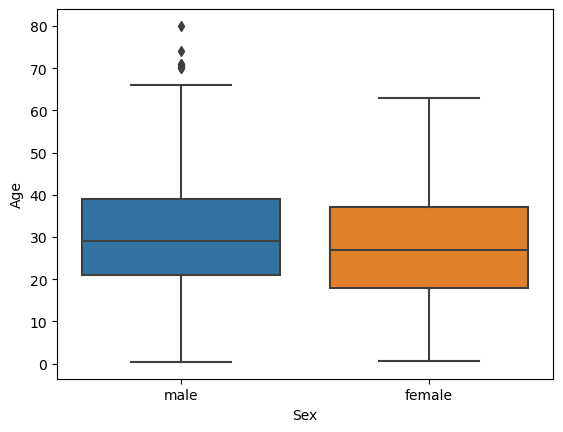

In [56]:
sns.boxplot(x='Sex',y='Age',data=df)

Mean value of Fare is : 32.2042079685746
Median value of Fare is : 14.4542


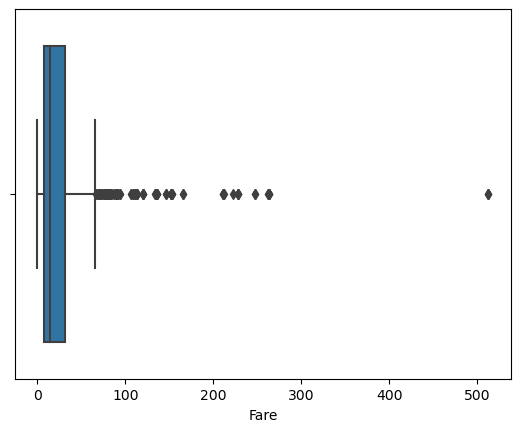

In [57]:
sns.boxplot("Fare",data=df)


print("Mean value of Fare is :",df.Fare.mean())
print("Median value of Fare is :",df.Fare.median())

Now that we have visualized our data , we can proceed to fill in the NaN values in our test and train datasets and drop the columns that we will not require

In [70]:
drop_list = ['Cabin', 'Ticket', 'PassengerId']
df = df.drop(drop_list, axis=1)

KeyError: "['Cabin', 'Ticket', 'PassengerId'] not found in axis"

In [64]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [74]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


let us we fill the missing value of Embarked column .Most of the people start their journey from Southhampton port. hence we will fill the data by "S"

In [75]:
df.Embarked.fillna('S', inplace=True)

In [76]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


we will replace the NaN value from the Age column with meadian value .

In [77]:
df.Age.fillna(28, inplace=True)

In [78]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


There is a small fraction of fare values missing in the fare column which we will fill using the median value since there a plenty of outliers in the data.

In [79]:
df.Fare.fillna(df.Fare.median(),inplace = True)

The name column might not be useful to us directly but a lot of names have titles like Mr, Mrs, Lady, etc which might indicate the individual's status in the society which can affect the chance of survival.

We shall try to extract a Title feature form the name column which might improve the performanc of our model.

In [80]:
Combined_data=[df]

<AxesSubplot:xlabel='count', ylabel='Title'>

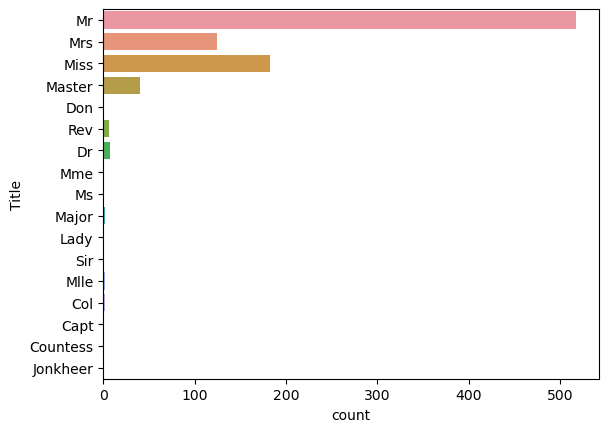

In [81]:
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

sns.countplot(y='Title',data=df)

There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.

In [84]:
for dataset in Combined_data:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

In [86]:
dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<AxesSubplot:xlabel='count', ylabel='Title'>

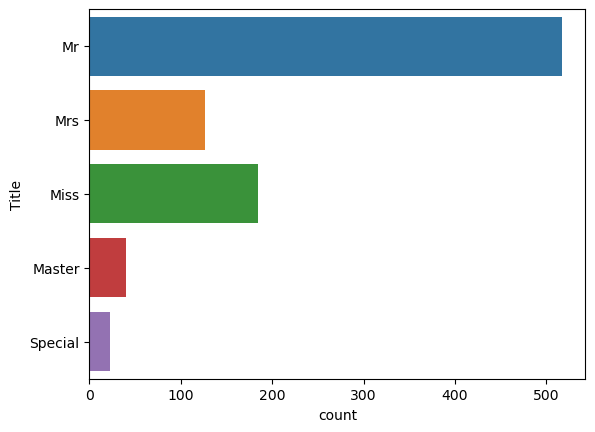

In [87]:
sns.countplot(y='Title', data=df)

In [90]:
title_mapping={'Mr': 1, 'Miss': 2 , 'Mrs': 3, 'Master': 4, 'Special':5}
for dataset in Combined_data:
    dataset['Title']= dataset.Title.map(title_mapping)
    dataset['Title']=dataset.Title.fillna(0)

As we observed from our data visualization being alone on the titanic had a disadvantage when it came to survival: Next we will create a feature IsAlone which depends on the number of family members that can be calculated from the Parch and SibSp columns



In [93]:
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
    df.head()   

In [94]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [95]:
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

Age had big role to play when it came to survival. Clearly younger people were more likely to survive. Hence, it should be worth considering a feature IsMinor for the passengers under the age of 15.

In [96]:
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

Older female passengers also had a higher chance of survival. Let's create a feature name Old_female that would account for women older tha 50 years on board

In [100]:
df['Old_Female'] = (df['Age']>50)&(df['Sex']=='female')
df['Old_Female'] = df['Old_Female'].astype(int)


Pclass, Sex and Embarked are the categorical features in our data. we can convert these categorucal variables into dummy variables using the get_dummies method in python

In [102]:
df2=pd.get_dummies(df, columns=['Pclass','Sex','Embarked'],drop_first=True)

In [103]:
df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,0,1,1,0,1
1,1,38.0,71.2833,3,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,2,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,3,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,0,0,1,1,0,1


We will try out some different ML models to see which gives us the best result. the process will be as follows:

Importing the required machine learning libraries from scikit learn.

Splitting out training data into train and test datasets to check the performance of our model.

Try out different classifying model to see which fits the bes

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [136]:
X=df2.drop('Survived',axis=1)
Y=df2['Survived']

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [138]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

78.36

Our score also depends on how we had split our training data using train_test_split. We should also perform k-fold cross validation to get a more accurate score. Here we will be going with 5 folds.

In [139]:
cv_scores=cross_val_score(logreg,X,Y,cv=5)

np.mean(cv_scores)*100

80.023225158496

In [140]:
random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 8}
Best score: 82.04255853367648


In [142]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 6, 'n_estimators': 19}
Best score: 83.27725817588349


The best prediction model is GridSearchCV has contain 83%. 